In [118]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mplt
import pandas as pd
import os
import sys
import string
import re
import nltk
from nltk import ngrams
from unidecode import unidecode
from nltk.corpus import stopwords

def standardize(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove leading/trailing whitespace
    text = text.strip()
    
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    # Remove diacritics and accents
    text = unidecode(text)

    # Tokenization
    text = text.split()

    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    text = [word for word in text if word not in stop_words]

    # Return the standardized string
    #return ' '.join(text)

    return text

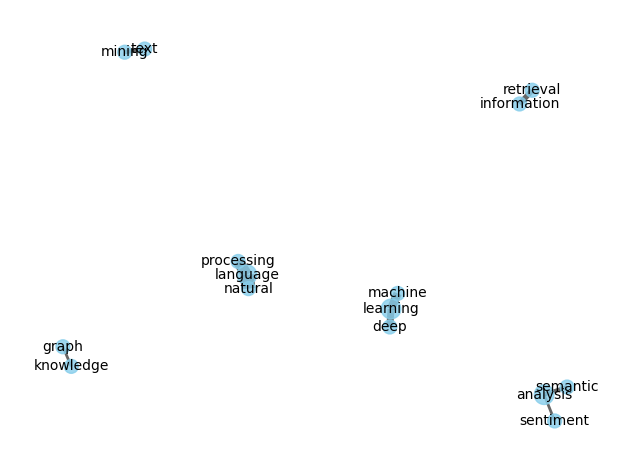

In [1]:


# Example bigrams and their frequencies
bigrams = {
    ('natural', 'language'): 10,
    ('language', 'processing'): 8,
    ('machine', 'learning'): 6,
    ('deep', 'learning'): 5,
    ('information', 'retrieval'): 4,
    ('semantic', 'analysis'): 3,
    ('text', 'mining'): 3,
    ('sentiment', 'analysis'): 2,
    ('knowledge', 'graph'): 2
}

# Create an empty graph
G = nx.Graph()

# Add nodes and edges to the graph based on bigrams
for bigram, frequency in bigrams.items():
    word1, word2 = bigram
    G.add_edge(word1, word2, weight=frequency)

# Set node sizes based on their degree
node_sizes = [G.degree(node) * 100 for node in G.nodes()]

# Set edge widths based on their weight
edge_widths = [data['weight'] for _, _, data in G.edges(data=True)]

# Position nodes using the spring layout algorithm
pos = nx.spring_layout(G)

# Draw nodes, edges, labels, and adjust visual parameters
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='skyblue', alpha=0.8)
nx.draw_networkx_edges(G, pos, width=edge_widths, alpha=0.6)
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')
plt.axis('off')

# Display the visualization
plt.tight_layout()
plt.show()


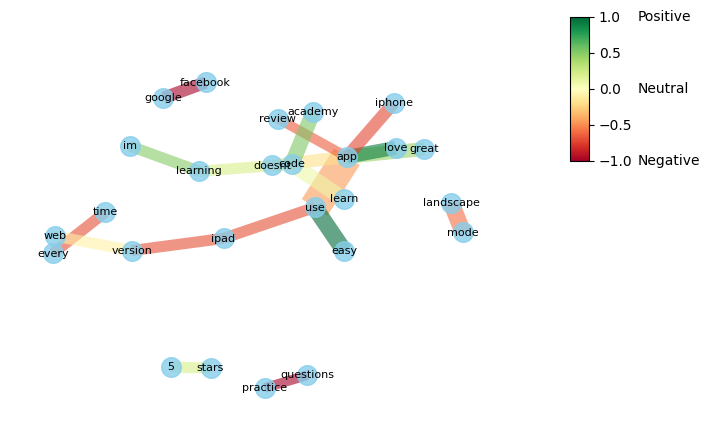

In [194]:
import pandas as pd
import os
import sys
import string
import re
import nltk
from nltk import ngrams
from unidecode import unidecode
from nltk.corpus import stopwords

def preprocess(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove leading/trailing whitespace
    text = text.strip()
    
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    # Remove diacritics and accents
    text = unidecode(text)

    # Tokenization
    text = text.split()

    # Remove stopwords
    # stop_words = set(stopwords.words("english"))
    # text = [word for word in text if word not in stop_words]

    # Return the standardized string
    #return ' '.join(text)

    return text



# filelist = [file for file in os.listdir('./googleplay-review-files-standardized/')]

# for file in filelist:
#     print(file)
    
df = pd.read_csv('./applestore-review-files-standardized/applestore-review-codeacademy_sentiment_standardized.csv')

# Tokenize and preprocess the reviews
df['standardizedReview'] = df['standardizedReview'].astype('str')
df['standardizedReview'] = df['standardizedReview'].apply(preprocess)  # Replace preprocess with your preprocessing function

df['sentimentScore'] = df['sentiment'].map({'POSITIVE': 1, 'NEUTRAL': 0, 'NEGATIVE': -1})

# Generate bigrams for each review
df['bigrams'] = df['standardizedReview'].apply(lambda x: list(ngrams(x, 2)))
bigram_frequency = df['bigrams'].explode().value_counts().to_dict()
#filtered_bigrams = bigram_frequency
#filtered_bigrams = {bigram: frequency for bigram, frequency in bigram_frequency.items() if frequency > 4}

sorted_bigrams = sorted(bigram_frequency.items(), key=lambda x: x[1], reverse=True)
bigram_count = 20
filtered_bigrams = dict(sorted_bigrams[:bigram_count])

bigram_sentiment = df.explode('bigrams').groupby('bigrams')['sentimentScore'].mean().to_dict()

# Print the dataframe with bigrams
# print(df)
df.to_csv('test1.csv')
df1 = pd.DataFrame.from_dict(bigram_frequency, orient='index')
df1.to_csv('test2.csv')
df2 = pd.DataFrame.from_dict(bigram_sentiment, orient='index')
df2.to_csv('test3.csv')
# print(1)
# print(bigram_frequency)
# print(bigram_sentiment)
# print(1)



# Create a network graph
G = nx.Graph()

# Add nodes for unigrams and bigrams
# for unigram in df['standardizedReview'].explode().unique():
#     G.add_node(unigram)

# for bigram in filtered_bigrams:
#     G.add_node(bigram)

# Add edges with size and color attributes
for bigram, frequency in filtered_bigrams.items():
    sentiment = bigram_sentiment.get(bigram, 0.0)
    G.add_edge(bigram[0], bigram[1], weight=frequency, sentiment=sentiment)

# Set edge sizes based on frequency and edge colors based on sentiment
edge_sizes = [data['weight'] for _, _, data in G.edges(data=True)]
edge_colors = [data['sentiment'] for _, _, data in G.edges(data=True)]

# Position nodes using a layout algorithm (e.g., spring layout)
#pos = nx.spring_layout(G, k=1)
pos = nx.fruchterman_reingold_layout(G, k=1)

# Draw nodes, edges, labels, and adjust visual parameters
nx.draw_networkx_nodes(G, pos, node_size=200, node_color='skyblue', alpha=0.8)
nx.draw_networkx_edges(G, pos, width=edge_sizes, edge_color=edge_colors, edge_cmap=plt.cm.RdYlGn, alpha=0.6)
#nx.draw_networkx_edges(G, pos, edge_color='grey', edge_cmap=plt.cm.RdYlGn, alpha=0.6)
nx.draw_networkx_labels(G, pos, font_size=8, font_family='sans-serif')
plt.axis('off')

# Create colorbar legend
# sm = plt.cm.ScalarMappable(cmap=mplt.colormaps['RdYlGn'], norm=plt.Normalize(vmin=-1, vmax=1))
# sm.set_array([])
# plt.colorbar(sm, label='Negative                         Positive\nSentiment', orientation='vertical', shrink=0.3)

# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap=mplt.colormaps['RdYlGn'], norm=plt.Normalize(vmin=-1, vmax=1))
sm.set_array([])
cbar_ax = plt.gcf().add_axes([1, 0.65, 0.03, 0.3])  # Adjust the position and size of the colorbar axes
cbar = plt.colorbar(sm, cax=cbar_ax, shrink=0.5)  # Assign the colorbar axes

# Rotate the colorbar label
cbar.ax.yaxis.set_label_coords(-1.5, 3)
#cbar.ax.set_ylabel('Bigram Sentiment')

# Add labels next to colorbar
plt.text(3.5, 1, 'Positive', ha='left', va='center')
plt.text(3.5, 0, 'Neutral', ha='left', va='center')
plt.text(3.5, -1, 'Negative', ha='left', va='center')

# Display the visualization
#plt.tight_layout()
plt.show()






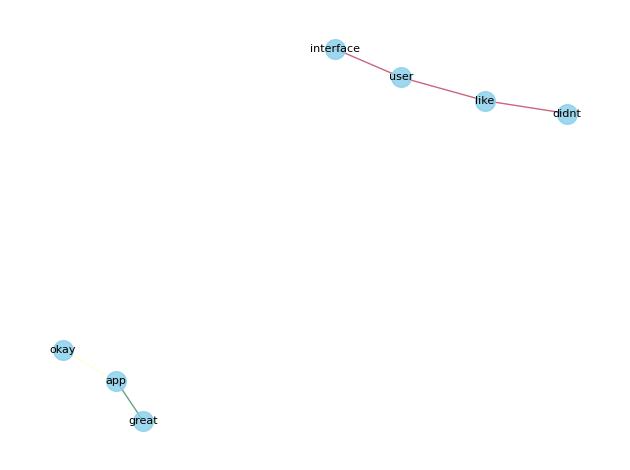

In [39]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from nltk import ngrams

# Example dataframe of user reviews and associated sentiment
stuff = {
    'Review': ["This app is great", "I didn't like the user interface", "It's an okay app"],
    'Sentiment': ["positive", "negative", "neutral"]
}
df = pd.DataFrame(stuff)

# Preprocess reviews, calculate sentiment scores, and generate bigrams
df['Review'] = df['Review'].apply(standardize)  # Replace preprocess with your preprocessing function
df['Sentiment_Score'] = df['Sentiment'].map({'positive': 1, 'neutral': 0, 'negative': -1})
df['Bigrams'] = df['Review'].apply(lambda x: list(ngrams(x, 2)))

# Count the frequency of each bigram
bigram_frequency = df['Bigrams'].explode().value_counts().to_dict()

# Calculate the average sentiment for each bigram
bigram_sentiment = df.explode('Bigrams').groupby('Bigrams')['Sentiment_Score'].mean().to_dict()

# Create a network graph
G = nx.Graph()

# Add nodes for unigrams and bigrams
# for unigram in df['Review'].explode().unique():
#     G.add_node(unigram)

# for bigram in df['Bigrams'].explode().unique():
#     G.add_node(bigram)

# Add edges with size and color attributes
for bigram, frequency in bigram_frequency.items():
    sentiment = bigram_sentiment.get(bigram, 0.0)
    G.add_edge(bigram[0], bigram[1], weight=frequency, sentiment=sentiment)

# Set edge sizes based on frequency and edge colors based on sentiment
edge_sizes = [data['weight'] for _, _, data in G.edges(data=True)]
edge_colors = [data['sentiment'] for _, _, data in G.edges(data=True)]

# Position nodes using a layout algorithm (e.g., spring layout)
pos = nx.spring_layout(G)

# Draw nodes, edges, labels, and adjust visual parameters
nx.draw_networkx_nodes(G, pos, node_size=200, node_color='skyblue', alpha=0.8)
nx.draw_networkx_edges(G, pos, width=edge_sizes, edge_color=edge_colors, edge_cmap=plt.cm.RdYlGn, alpha=0.6)
nx.draw_networkx_labels(G, pos, font_size=8, font_family='sans-serif')
plt.axis('off')

# Display the visualization
plt.tight_layout()
plt.show()


In [4]:
import pandas as pd
import plotly
import plotly.graph_objects as go
from nltk import ngrams

# Example dataframe of user reviews and associated sentiment
data = {
    'Review': ["This app is great", "I didn't like the user interface", "It's an okay app"],
    'Sentiment': ["positive", "negative", "neutral"]
}
df = pd.DataFrame(data)

# Preprocess reviews and generate bigrams
df['Review'] = df['Review'].apply(standardize)  # Replace preprocess with your preprocessing function
# df['Sentiment_Score'] = df['Sentiment'].map({'positive': 1, 'neutral': 0, 'negative': -1})
df['Bigrams'] = df['Review'].apply(lambda x: list(ngrams(x, 2)))

# Count the frequency of each bigram
bigram_frequency = df['Bigrams'].explode().value_counts().to_dict()

# Filter bigrams with frequency greater than a threshold
threshold = 0
filtered_bigrams = {bigram: frequency for bigram, frequency in bigram_frequency.items() if frequency > threshold}

# Create a network graph
G = nx.Graph()

# Add nodes for unigrams and bigrams
# for unigram in df['Review'].explode().unique():
#     G.add_node(unigram)

# for bigram in filtered_bigrams:
#     G.add_node(bigram)

# Add edges with size based on frequency
for bigram, frequency in filtered_bigrams.items():
    G.add_edge(bigram[0], bigram[1], weight=frequency)
    print(bigram)
    print(frequency)

# Prepare node positions using a layout algorithm
pos = nx.spring_layout(G, dim=3)

# Extract node positions for plotting
node_x = [pos[node][0] for node in G.nodes()]
node_y = [pos[node][1] for node in G.nodes()]
node_z = [pos[node][2] for node in G.nodes()]

# Create edge trace
edge_x = []
edge_y = []
edge_z = []
edge_weights = []
for edge in G.edges():
    x0, y0, z0 = pos[edge[0]]
    x1, y1, z1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])
    edge_z.extend([z0, z1, None])
    edge_weights.extend([G.edges[edge]['weight'], G.edges[edge]['weight'], None])

print(edge_weights)

# Create a 3D scatter plot for nodes
node_trace = go.Scatter3d(
    x=node_x,
    y=node_y,
    z=node_z,
    mode='markers',
    marker=dict(
        size=8,
        color='skyblue',
        line=dict(width=0.5, color='black'),
        opacity=0.8
    ),
    text=list(G.nodes()),
    hoverinfo='text'
)

# Create a 3D scatter plot for edges
edge_trace = go.Scatter3d(
    x=edge_x,
    y=edge_y,
    z=edge_z,
    mode='lines',
    line=dict(color='red', width=1.5),
    hoverinfo='none'
)

# Create the figure
fig = go.Figure(data=[node_trace, edge_trace])

# Set layout properties
fig.update_layout(
    title='Bigram-based Semantic Network',
    title_font_size=24,
    showlegend=False,
    scene=dict(
        xaxis=dict(title='X'),
        yaxis=dict(title='Y'),
        zaxis=dict(title='Z')
    )
)

# Display the interactive plot
fig.show()

import plotly.graph_objects as go
import plotly.io as pio
import webbrowser

# Save the plot as an HTML file
html_file = 'plot.html'
pio.write_html(fig, file=html_file)

# Open the HTML file in a new browser tab
webbrowser.open_new_tab('file://' + html_file)

('app', 'great')
1
('didnt', 'like')
1
('like', 'user')
1
('user', 'interface')
1
('okay', 'app')
1
[1, 1, None, 1, 1, None, 1, 1, None, 1, 1, None, 1, 1, None]


True

In [54]:
import pandas as pd
import plotly.graph_objects as go
from nltk import ngrams

# Example dataframe of user reviews and associated sentiment
data = {
    'Review': ["This app is great", "I didn't like the user interface", "It's an okay app"],
    'Sentiment': ["positive", "negative", "neutral"]
}
df = pd.DataFrame(data)

# Preprocess reviews and generate bigrams
df['Review'] = df['Review'].apply(standardize)  # Replace preprocess with your preprocessing function
df['Bigrams'] = df['Review'].apply(lambda x: list(ngrams(x, 2)))

# Count the frequency of each bigram
bigram_frequency = df['Bigrams'].explode().value_counts().to_dict()

# Filter bigrams with frequency greater than a threshold
threshold = 0
filtered_bigrams = {bigram: frequency for bigram, frequency in bigram_frequency.items() if frequency > threshold}

# Create a network graph
G = nx.Graph()

# Add nodes for unigrams and bigrams
for unigram in df['Review'].explode().unique():
    G.add_node(unigram)

for bigram in filtered_bigrams:
    G.add_node(bigram)

# Add edges with size based on frequency
for bigram, frequency in filtered_bigrams.items():
    G.add_edge(bigram[0], bigram[1], weight=frequency)

# Prepare node positions using a layout algorithm
pos = nx.spring_layout(G)

# Create edge trace
edge_x = []
edge_y = []
edge_weights = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1])
    edge_y.extend([y0, y1])
    edge_weights.extend([G.edges[edge]['weight'], G.edges[edge]['weight']])

# Create a scatter plot for nodes
node_trace = go.Scatter(
    x=[pos[node][0] for node in G.nodes()],
    y=[pos[node][1] for node in G.nodes()],
    mode='markers',
    marker=dict(
        size=8,
        color='skyblue',
        line=dict(width=0.5, color='black'),
        opacity=0.8
    ),
    text=list(G.nodes()),
    hoverinfo='text'
)

# Create a scatter plot for edges
edge_trace = go.Scatter(
    x=edge_x,
    y=edge_y,
    mode='lines',
    line=dict(color=edge_weights, colorscale='RdYlGn', width=1.5, colorbar=dict(title='Frequency'), showscale=True),
    hoverinfo='none'
)

# Create the figure
fig = go.Figure(data=[node_trace, edge_trace])

# Set layout properties
fig.update_layout(
    title='Bigram-based Semantic Network',
    title_font_size=24,
    showlegend=False,
    hovermode='closest',
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)
)

# Display the interactive plot
fig.show()

ValueError: 
    Invalid value of type 'builtins.list' received for the 'color' property of scatter.line
        Received value: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

    The 'color' property is a color and may be specified as:
      - A hex string (e.g. '#ff0000')
      - An rgb/rgba string (e.g. 'rgb(255,0,0)')
      - An hsl/hsla string (e.g. 'hsl(0,100%,50%)')
      - An hsv/hsva string (e.g. 'hsv(0,100%,100%)')
      - A named CSS color:
            aliceblue, antiquewhite, aqua, aquamarine, azure,
            beige, bisque, black, blanchedalmond, blue,
            blueviolet, brown, burlywood, cadetblue,
            chartreuse, chocolate, coral, cornflowerblue,
            cornsilk, crimson, cyan, darkblue, darkcyan,
            darkgoldenrod, darkgray, darkgrey, darkgreen,
            darkkhaki, darkmagenta, darkolivegreen, darkorange,
            darkorchid, darkred, darksalmon, darkseagreen,
            darkslateblue, darkslategray, darkslategrey,
            darkturquoise, darkviolet, deeppink, deepskyblue,
            dimgray, dimgrey, dodgerblue, firebrick,
            floralwhite, forestgreen, fuchsia, gainsboro,
            ghostwhite, gold, goldenrod, gray, grey, green,
            greenyellow, honeydew, hotpink, indianred, indigo,
            ivory, khaki, lavender, lavenderblush, lawngreen,
            lemonchiffon, lightblue, lightcoral, lightcyan,
            lightgoldenrodyellow, lightgray, lightgrey,
            lightgreen, lightpink, lightsalmon, lightseagreen,
            lightskyblue, lightslategray, lightslategrey,
            lightsteelblue, lightyellow, lime, limegreen,
            linen, magenta, maroon, mediumaquamarine,
            mediumblue, mediumorchid, mediumpurple,
            mediumseagreen, mediumslateblue, mediumspringgreen,
            mediumturquoise, mediumvioletred, midnightblue,
            mintcream, mistyrose, moccasin, navajowhite, navy,
            oldlace, olive, olivedrab, orange, orangered,
            orchid, palegoldenrod, palegreen, paleturquoise,
            palevioletred, papayawhip, peachpuff, peru, pink,
            plum, powderblue, purple, red, rosybrown,
            royalblue, rebeccapurple, saddlebrown, salmon,
            sandybrown, seagreen, seashell, sienna, silver,
            skyblue, slateblue, slategray, slategrey, snow,
            springgreen, steelblue, tan, teal, thistle, tomato,
            turquoise, violet, wheat, white, whitesmoke,
            yellow, yellowgreen

In [2]:
import pandas as pd
import plotly.graph_objects as go
from nltk import ngrams
import numpy as np

# Example dataframe of user reviews and associated sentiment
data = {
    'Review': ["This app is great", "I didn't like the user interface", "It's an okay app"],
    'Sentiment': ["positive", "negative", "neutral"]
}
df = pd.DataFrame(data)

# Preprocess reviews and generate bigrams
df['Review'] = df['Review'].apply(standardize)  # Replace preprocess with your preprocessing function
df['Bigrams'] = df['Review'].apply(lambda x: list(ngrams(x, 2)))

# Count the frequency of each bigram
bigram_frequency = df['Bigrams'].explode().value_counts().to_dict()

# Filter bigrams with frequency greater than a threshold
threshold = 0
filtered_bigrams = {bigram: frequency for bigram, frequency in bigram_frequency.items() if frequency > threshold}

# Create a network graph
G = nx.Graph()

# Add nodes for unigrams and bigrams
for unigram in df['Review'].explode().unique():
    G.add_node(unigram)

for bigram in filtered_bigrams:
    G.add_node(bigram)

# Add edges with size based on frequency
for bigram, frequency in filtered_bigrams.items():
    G.add_edge(bigram[0], bigram[1], weight=frequency)

# Prepare node positions using a layout algorithm
pos = nx.spring_layout(G)

# Create edge trace
edge_x = []
edge_y = []
edge_weights = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1])
    edge_y.extend([y0, y1])
    edge_weights.extend([G.edges[edge]['weight'], G.edges[edge]['weight']])

# Map edge weights to a color range
min_weight = min(edge_weights)
max_weight = max(edge_weights)
color_range = np.linspace(0, 1, len(edge_weights))
edge_colors = [f'rgb(255, {int(255 * (1 - color))}, {int(255 * (1 - color))})' for color in color_range]

# Create a scatter plot for nodes
node_trace = go.Scatter(
    x=[pos[node][0] for node in G.nodes()],
    y=[pos[node][1] for node in G.nodes()],
    mode='markers',
    marker=dict(
        size=8,
        color='skyblue',
        line=dict(width=0.5, color='black'),
        opacity=0.8
    ),
    text=list(G.nodes()),
    hoverinfo='text'
)

# Create a scatter plot for edges
edge_trace = go.Scatter(
    x=edge_x,
    y=edge_y,
    mode='lines',
    line=dict(color=edge_colors[0], width=1.5),
    hoverinfo='none'
)

# Create the figure
fig = go.Figure(data=[node_trace, edge_trace])

# Set layout properties
fig.update_layout(
    title='Bigram-based Semantic Network',
    title_font_size=24,
    showlegend=False,
    hovermode='closest',
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)
)

# Display the interactive plot
fig.show()